In [1]:
import tensorflow
import keras
import csv
import numpy
import matplotlib.pyplot as plot

random_seed = 0

#loading data
Path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv"
dataset = numpy.loadtxt(Path, delimiter=",", skiprows=1)

#shuffling data
numpy.random.seed(random_seed)
numpy.random.shuffle(dataset)

#loading inputs and outputs
X1 = dataset[:,5:6] #Leptin
X2 = dataset[:,6:7] #Adiponectin
X3 = dataset[:,0:1] #Age
X4 = dataset[:,7:8] #Resistin
Y = dataset[:,9:10] #Classification

#normalization_function
def normalization(x):
    return (x - min(x)) / (max(x) - min(x))

#normalization
X1 = normalization(X1)
X2 = normalization(X2)
X3 = normalization(X3)
X4 = normalization(X4)

#load training data (Y)
Y = Y - 1

Using TensorFlow backend.


In [2]:
#setting a random seed
numpy.random.seed(random_seed)

#constructing input layers
input_layer_X1 = keras.layers.Input(shape=(1, ), name='input_layer_X1')
input_layer_X2 = keras.layers.Input(shape=(1, ), name='input_layer_X2')
input_layer_X3 = keras.layers.Input(shape=(1, ), name='input_layer_X3')
input_layer_X4 = keras.layers.Input(shape=(1, ), name='input_layer_X4')

#constructing hidden layers
merge_layer = keras.layers.concatenate([input_layer_X1, input_layer_X2, input_layer_X3, input_layer_X4], name='merge_layer')
hidden_layer_1 = keras.layers.Dense(9, activation = 'linear', name='hidden_layer_1')(merge_layer)
hidden_layer_2 = keras.layers.Dense(9, activation = 'tanh', name='hidden_layer_2')(hidden_layer_1)
hidden_layer_3 = keras.layers.Dense(9, activation = 'tanh', name='hidden_layer_3')(hidden_layer_2)

#constructing output layer
output_layer = keras.layers.Dense(1, activation = 'sigmoid', name='output_layer')(hidden_layer_3)

#constructing the model of neural network
model = keras.models.Model(inputs=[input_layer_X1, input_layer_X2, input_layer_X3, input_layer_X4], outputs=output_layer)
model.summary()

#setting loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics = ['acc', keras.metrics.AUC()])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer_X1 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X2 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X3 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X4 (InputLayer)     (None, 1)            0                                            
____________________________________________________________________________________________

In [3]:
#training the model of neural network
train_history = model.fit([X1, X2, X3, X4], Y, validation_split=0.2, epochs = 700, batch_size = 1)

Train on 92 samples, validate on 24 samples
Epoch 1/700
92/92 [==============================] - 1s 10ms/step - loss: 0.7011 - acc: 0.4674 - auc_1: 0.5138 - val_loss: 0.6747 - val_acc: 0.5833 - val_auc_1: 0.6607
Epoch 2/700
92/92 [==============================] - 0s 4ms/step - loss: 0.6872 - acc: 0.4891 - auc_1: 0.5829 - val_loss: 0.6664 - val_acc: 0.6250 - val_auc_1: 0.7250
Epoch 3/700
92/92 [==============================] - 0s 4ms/step - loss: 0.6853 - acc: 0.5217 - auc_1: 0.5421 - val_loss: 0.6662 - val_acc: 0.6250 - val_auc_1: 0.7214
Epoch 4/700
92/92 [==============================] - 0s 4ms/step - loss: 0.6794 - acc: 0.5109 - auc_1: 0.5998 - val_loss: 0.6647 - val_acc: 0.6667 - val_auc_1: 0.7000
Epoch 5/700
92/92 [==============================] - 0s 4ms/step - loss: 0.6735 - acc: 0.5652 - auc_1: 0.6167 - val_loss: 0.6574 - val_acc: 0.6250 - val_auc_1: 0.7143
Epoch 6/700
92/92 [==============================] - 0s 4ms/step - loss: 0.6733 - acc: 0.5109 - auc_1: 0.6107 - val_loss

92/92 [==============================] - 0s 4ms/step - loss: 0.5364 - acc: 0.7935 - auc_1: 0.7974 - val_loss: 0.7240 - val_acc: 0.5833 - val_auc_1: 0.6643
Epoch 50/700
92/92 [==============================] - 0s 5ms/step - loss: 0.5328 - acc: 0.7935 - auc_1: 0.7950 - val_loss: 0.7252 - val_acc: 0.5833 - val_auc_1: 0.6643
Epoch 51/700
92/92 [==============================] - 0s 5ms/step - loss: 0.5421 - acc: 0.7283 - auc_1: 0.7826 - val_loss: 0.7416 - val_acc: 0.5833 - val_auc_1: 0.6607
Epoch 52/700
92/92 [==============================] - 0s 4ms/step - loss: 0.5350 - acc: 0.7391 - auc_1: 0.7886 - val_loss: 0.7429 - val_acc: 0.5833 - val_auc_1: 0.6857
Epoch 53/700
92/92 [==============================] - 0s 4ms/step - loss: 0.5285 - acc: 0.7609 - auc_1: 0.7981 - val_loss: 0.7498 - val_acc: 0.5833 - val_auc_1: 0.6893
Epoch 54/700
92/92 [==============================] - 0s 4ms/step - loss: 0.5277 - acc: 0.7391 - auc_1: 0.7950 - val_loss: 0.7505 - val_acc: 0.5833 - val_auc_1: 0.6607
Epoch

Epoch 98/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4438 - acc: 0.7826 - auc_1: 0.8719 - val_loss: 0.9427 - val_acc: 0.5833 - val_auc_1: 0.5893
Epoch 99/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4444 - acc: 0.8152 - auc_1: 0.8674 - val_loss: 0.9369 - val_acc: 0.5833 - val_auc_1: 0.5929
Epoch 100/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4388 - acc: 0.7935 - auc_1: 0.8719 - val_loss: 0.9342 - val_acc: 0.6250 - val_auc_1: 0.5750
Epoch 101/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4397 - acc: 0.8043 - auc_1: 0.8719 - val_loss: 0.9325 - val_acc: 0.6250 - val_auc_1: 0.5929
Epoch 102/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4416 - acc: 0.7826 - auc_1: 0.8764 - val_loss: 0.9528 - val_acc: 0.5833 - val_auc_1: 0.5929
Epoch 103/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4478 - acc: 0.7826 - auc_1: 0.8757 - val_loss: 0.9976 - val_acc: 0.5833 - val_au

92/92 [==============================] - 0s 4ms/step - loss: 0.3430 - acc: 0.8261 - auc_1: 0.9276 - val_loss: 0.8752 - val_acc: 0.6667 - val_auc_1: 0.6571
Epoch 147/700
92/92 [==============================] - 0s 5ms/step - loss: 0.3589 - acc: 0.7935 - auc_1: 0.9157 - val_loss: 0.9231 - val_acc: 0.6667 - val_auc_1: 0.6750
Epoch 148/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3399 - acc: 0.8478 - auc_1: 0.9310 - val_loss: 0.8999 - val_acc: 0.6667 - val_auc_1: 0.6643
Epoch 149/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3471 - acc: 0.7935 - auc_1: 0.9217 - val_loss: 0.9807 - val_acc: 0.6250 - val_auc_1: 0.6357
Epoch 150/700
92/92 [==============================] - 0s 5ms/step - loss: 0.3465 - acc: 0.8043 - auc_1: 0.9262 - val_loss: 0.9904 - val_acc: 0.6667 - val_auc_1: 0.6607
Epoch 151/700
92/92 [==============================] - 0s 5ms/step - loss: 0.3421 - acc: 0.8370 - auc_1: 0.9314 - val_loss: 0.8636 - val_acc: 0.6667 - val_auc_1: 0.6607


92/92 [==============================] - 0s 4ms/step - loss: 0.2801 - acc: 0.8478 - auc_1: 0.9543 - val_loss: 1.0299 - val_acc: 0.6250 - val_auc_1: 0.6821
Epoch 195/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2826 - acc: 0.8478 - auc_1: 0.9507 - val_loss: 0.9718 - val_acc: 0.6250 - val_auc_1: 0.6857
Epoch 196/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2782 - acc: 0.8696 - auc_1: 0.9571 - val_loss: 1.1466 - val_acc: 0.6250 - val_auc_1: 0.6786
Epoch 197/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2804 - acc: 0.8478 - auc_1: 0.9545 - val_loss: 1.0286 - val_acc: 0.6250 - val_auc_1: 0.6679
Epoch 198/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2701 - acc: 0.8478 - auc_1: 0.9624 - val_loss: 1.2105 - val_acc: 0.5833 - val_auc_1: 0.6500
Epoch 199/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2862 - acc: 0.8478 - auc_1: 0.9488 - val_loss: 1.1447 - val_acc: 0.5833 - val_auc_1: 0.6679


92/92 [==============================] - 0s 4ms/step - loss: 0.1900 - acc: 0.9130 - auc_1: 0.9845 - val_loss: 1.1826 - val_acc: 0.6250 - val_auc_1: 0.6893
Epoch 243/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2019 - acc: 0.9130 - auc_1: 0.9833 - val_loss: 1.3670 - val_acc: 0.5833 - val_auc_1: 0.6643
Epoch 244/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1970 - acc: 0.9348 - auc_1: 0.9852 - val_loss: 1.2992 - val_acc: 0.5833 - val_auc_1: 0.6750
Epoch 245/700
92/92 [==============================] - 0s 5ms/step - loss: 0.1991 - acc: 0.8804 - auc_1: 0.9812 - val_loss: 1.2000 - val_acc: 0.5833 - val_auc_1: 0.6857
Epoch 246/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1979 - acc: 0.9239 - auc_1: 0.9836 - val_loss: 1.2040 - val_acc: 0.6250 - val_auc_1: 0.6857
Epoch 247/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1831 - acc: 0.9348 - auc_1: 0.9879 - val_loss: 1.2389 - val_acc: 0.5833 - val_auc_1: 0.6786


92/92 [==============================] - 0s 4ms/step - loss: 0.1395 - acc: 0.9565 - auc_1: 0.9905 - val_loss: 1.4150 - val_acc: 0.6250 - val_auc_1: 0.6643
Epoch 291/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1135 - acc: 0.9674 - auc_1: 0.9990 - val_loss: 1.4089 - val_acc: 0.6250 - val_auc_1: 0.6643
Epoch 292/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1254 - acc: 0.9783 - auc_1: 0.9981 - val_loss: 1.4837 - val_acc: 0.6250 - val_auc_1: 0.6857
Epoch 293/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1332 - acc: 0.9565 - auc_1: 0.9933 - val_loss: 1.4587 - val_acc: 0.6250 - val_auc_1: 0.6786
Epoch 294/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1575 - acc: 0.9457 - auc_1: 0.9883 - val_loss: 1.4225 - val_acc: 0.5833 - val_auc_1: 0.6643
Epoch 295/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1195 - acc: 0.9674 - auc_1: 0.9976 - val_loss: 1.4925 - val_acc: 0.6250 - val_auc_1: 0.6679


92/92 [==============================] - 0s 4ms/step - loss: 0.0864 - acc: 0.9783 - auc_1: 0.9986 - val_loss: 1.5639 - val_acc: 0.6250 - val_auc_1: 0.6786
Epoch 339/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1050 - acc: 0.9674 - auc_1: 0.9960 - val_loss: 1.5279 - val_acc: 0.6250 - val_auc_1: 0.6857
Epoch 340/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0853 - acc: 0.9891 - auc_1: 0.9995 - val_loss: 1.5297 - val_acc: 0.5833 - val_auc_1: 0.6714
Epoch 341/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0777 - acc: 0.9783 - auc_1: 0.9995 - val_loss: 1.5775 - val_acc: 0.6250 - val_auc_1: 0.6571
Epoch 342/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0814 - acc: 0.9891 - auc_1: 0.9995 - val_loss: 1.6499 - val_acc: 0.6250 - val_auc_1: 0.6536
Epoch 343/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0867 - acc: 0.9891 - auc_1: 0.9993 - val_loss: 1.6267 - val_acc: 0.6250 - val_auc_1: 0.6571


92/92 [==============================] - 0s 3ms/step - loss: 0.0597 - acc: 0.9783 - auc_1: 0.9995 - val_loss: 1.6775 - val_acc: 0.6250 - val_auc_1: 0.6857
Epoch 387/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0756 - acc: 0.9674 - auc_1: 0.9976 - val_loss: 1.6792 - val_acc: 0.6250 - val_auc_1: 0.6357
Epoch 388/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0573 - acc: 0.9891 - auc_1: 0.9995 - val_loss: 1.6551 - val_acc: 0.6250 - val_auc_1: 0.6786
Epoch 389/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0575 - acc: 0.9891 - auc_1: 1.0000 - val_loss: 1.6487 - val_acc: 0.6250 - val_auc_1: 0.6964
Epoch 390/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0526 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.6509 - val_acc: 0.6250 - val_auc_1: 0.7000
Epoch 391/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0534 - acc: 0.9891 - auc_1: 0.9995 - val_loss: 1.6203 - val_acc: 0.6250 - val_auc_1: 0.6964


92/92 [==============================] - 1s 6ms/step - loss: 0.1383 - acc: 0.9348 - auc_1: 0.9907 - val_loss: 1.5503 - val_acc: 0.6667 - val_auc_1: 0.7000
Epoch 435/700
92/92 [==============================] - 0s 5ms/step - loss: 0.1322 - acc: 0.9348 - auc_1: 0.9924 - val_loss: 1.8050 - val_acc: 0.6250 - val_auc_1: 0.6964
Epoch 436/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0353 - acc: 0.9891 - auc_1: 1.0000 - val_loss: 1.8174 - val_acc: 0.6250 - val_auc_1: 0.7036
Epoch 437/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0319 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8244 - val_acc: 0.6250 - val_auc_1: 0.7107
Epoch 438/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0312 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8234 - val_acc: 0.6250 - val_auc_1: 0.7071
Epoch 439/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0325 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8144 - val_acc: 0.6250 - val_auc_1: 0.7107


92/92 [==============================] - 0s 3ms/step - loss: 0.0197 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.9263 - val_acc: 0.6250 - val_auc_1: 0.7214
Epoch 483/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0199 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.0008 - val_acc: 0.6250 - val_auc_1: 0.7036
Epoch 484/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0204 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.9633 - val_acc: 0.6250 - val_auc_1: 0.7071
Epoch 485/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0215 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.0211 - val_acc: 0.6250 - val_auc_1: 0.7071
Epoch 486/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0201 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.0004 - val_acc: 0.6250 - val_auc_1: 0.7036
Epoch 487/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0215 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.9714 - val_acc: 0.6250 - val_auc_1: 0.7036


92/92 [==============================] - 0s 4ms/step - loss: 0.0134 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.1481 - val_acc: 0.6250 - val_auc_1: 0.7179
Epoch 531/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0131 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.1343 - val_acc: 0.6250 - val_auc_1: 0.7214
Epoch 532/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0145 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.1242 - val_acc: 0.6250 - val_auc_1: 0.7286
Epoch 533/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0124 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.1458 - val_acc: 0.6250 - val_auc_1: 0.7179
Epoch 534/700
92/92 [==============================] - 0s 5ms/step - loss: 0.0124 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.1703 - val_acc: 0.6250 - val_auc_1: 0.7179
Epoch 535/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0120 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.1388 - val_acc: 0.6250 - val_auc_1: 0.7250


92/92 [==============================] - 0s 4ms/step - loss: 0.2083 - acc: 0.9565 - auc_1: 0.9717 - val_loss: 2.1426 - val_acc: 0.6667 - val_auc_1: 0.7321
Epoch 579/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1334 - acc: 0.9239 - auc_1: 0.9910 - val_loss: 1.9717 - val_acc: 0.6667 - val_auc_1: 0.7357
Epoch 580/700
92/92 [==============================] - 0s 5ms/step - loss: 0.1725 - acc: 0.9457 - auc_1: 0.9793 - val_loss: 2.2178 - val_acc: 0.6250 - val_auc_1: 0.6929
Epoch 581/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0431 - acc: 0.9891 - auc_1: 1.0000 - val_loss: 2.2483 - val_acc: 0.6250 - val_auc_1: 0.7143
Epoch 582/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0396 - acc: 0.9891 - auc_1: 0.9990 - val_loss: 2.1627 - val_acc: 0.6250 - val_auc_1: 0.7107
Epoch 583/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0092 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.1898 - val_acc: 0.6250 - val_auc_1: 0.7071


92/92 [==============================] - 0s 3ms/step - loss: 0.0069 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.0291 - val_acc: 0.6667 - val_auc_1: 0.7286
Epoch 627/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0063 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.0446 - val_acc: 0.6250 - val_auc_1: 0.7286
Epoch 628/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0064 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.0326 - val_acc: 0.6250 - val_auc_1: 0.7286
Epoch 629/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0068 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.0295 - val_acc: 0.6250 - val_auc_1: 0.7286
Epoch 630/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0062 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.0655 - val_acc: 0.6250 - val_auc_1: 0.7286
Epoch 631/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0063 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.0750 - val_acc: 0.6250 - val_auc_1: 0.7286


92/92 [==============================] - 0s 4ms/step - loss: 0.0077 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.2678 - val_acc: 0.6250 - val_auc_1: 0.7429
Epoch 675/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0062 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.2697 - val_acc: 0.6250 - val_auc_1: 0.7429
Epoch 676/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0059 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.2649 - val_acc: 0.6250 - val_auc_1: 0.7429
Epoch 677/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0057 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.2505 - val_acc: 0.6250 - val_auc_1: 0.7464
Epoch 678/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0056 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.2578 - val_acc: 0.6250 - val_auc_1: 0.7429
Epoch 679/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0056 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.2679 - val_acc: 0.6250 - val_auc_1: 0.7393


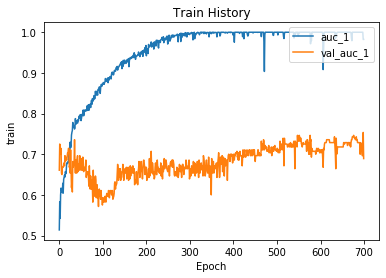

[array([[ 8.56361352e-03,  2.50269794e+00, -1.02937505e-01,
        -8.17059457e-01, -3.82311314e-01, -1.49907589e-01,
        -6.61107719e-01,  4.96194541e-01, -8.62986147e-01],
       [ 5.19470684e-02, -4.85296100e-01, -4.98523384e-01,
        -1.33650668e-03,  7.75950551e-01, -1.14557631e-01,
         1.04506540e+00, -1.94045126e+00, -6.10617746e-04],
       [ 6.53825581e-01, -1.60306662e-01,  1.02219176e+00,
         1.69568285e-01, -9.36928540e-02, -1.74324894e+00,
         1.43235338e+00, -1.94515064e-01, -5.06691575e-01],
       [ 2.33795857e+00,  1.69501531e+00, -2.54022169e+00,
         2.84878659e+00, -2.69246483e+00,  1.11735284e+00,
        -1.08466074e-01, -9.18680668e-01,  2.03782368e+00]], dtype=float32), array([-0.47854945, -0.14318715, -0.19443575, -0.20789707,  0.13270487,
        0.26561818, -0.73137397,  0.3139458 , -0.04280604], dtype=float32), array([[-2.144071  , -0.79500335,  0.10311586, -1.87705   ,  0.7356237 ,
         2.864803  ,  0.7072448 , -3.770244  , -0

In [4]:
#drawing the lines of losses and metrics
def show_train_history(train_history, x1, x2):
    plot.plot(train_history.history[x1])
    plot.plot(train_history.history[x2])
    plot.title('Train History')
    plot.ylabel('train')
    plot.xlabel('Epoch')
    plot.legend([x1, x2], loc = 'upper right')
    plot.show()

show_train_history(train_history, 'auc_1', 'val_auc_1')

#showing the weights in the model of neural network
print(model.get_weights())

In [5]:
#predicting the outputs of the model based on training data
predictions = model.predict([X1, X2, X3, X4])
print(predictions)

[[7.47294456e-04]
 [9.83229578e-01]
 [9.86993968e-01]
 [2.55261839e-04]
 [6.89222245e-04]
 [9.99745786e-01]
 [9.99908090e-01]
 [9.96663034e-01]
 [9.94369209e-01]
 [9.99933839e-01]
 [3.59912496e-03]
 [5.05043368e-04]
 [9.99711812e-01]
 [5.58215361e-05]
 [2.08777580e-02]
 [9.99992967e-01]
 [1.07701095e-02]
 [9.93926108e-01]
 [2.65658587e-01]
 [9.99902725e-01]
 [7.57044228e-03]
 [5.38612599e-04]
 [3.66064273e-02]
 [9.99942899e-01]
 [9.53382015e-01]
 [9.99996662e-01]
 [9.93994892e-01]
 [9.99914765e-01]
 [6.29870861e-04]
 [9.99999404e-01]
 [1.66601731e-05]
 [3.31358276e-02]
 [1.63057745e-02]
 [1.43246362e-02]
 [2.32672857e-04]
 [9.99983311e-01]
 [9.95685935e-01]
 [9.99414921e-01]
 [9.99921203e-01]
 [9.99987006e-01]
 [9.99995232e-01]
 [9.99254882e-01]
 [1.75095405e-02]
 [2.23471988e-02]
 [1.06417542e-06]
 [9.65946317e-01]
 [9.99978423e-01]
 [9.94571149e-01]
 [9.99990702e-01]
 [2.00344613e-04]
 [1.99440823e-04]
 [9.93969321e-01]
 [2.90583848e-04]
 [2.51460675e-04]
 [1.93110594e-04]
 [2.244099